### 1D CA Basics:

We first explore the implementation and emergent behavior of one-dimensional cellular automata.  In one dimension, a CA is a row of cells which can each take one of two states--zero and one.  The CA evolves in discrete timesteps, and with each evolution, the new state of a given cell is a function only of the former states of the cells in its "neighborhood."  

We will apply periodic boundary conditions to these cases, and will take the neighborhood of a cell to be itself and its immediate neighbors.   We will use the following convention, established by Wolfram, in referencing the 256 possible functions which determine the evolution of the system.

Consider the eight possible 3-cell neighborhood configurations in the following order: 
111, 110, 101, 100, 011, 010, 001, 000. 
Each of these must result either in a zero or a one in the next timestep. When each of these outputs is listed in the same order as above, an eight-digit binary number is thus specified.  This number is converted to an integer i, and the function is called "Rule i"

In [58]:
# We'll first create functions to initialize a one-dimensional grid of cells and to represent the evolution rules

import numpy as np
import matplotlib.pyplot as plt

def create_1d_grid(length):
    '''
    Creates a 1d grid of specified length
    
    length: (int) number of cells in grid
    '''
    return np. zeros(length)




def rule(integer):
    '''
    Takes an integer between 0 and 256 and returns a dictionary relating the 8 three digit binary numbers (as strings)
    to either zero or one
    
    integer: (int) integer between 0 and 256
    '''
    mapping = {}
    for i in range(8):
        mapping[str(format(i, '03b'))] = int(format(integer, '08b')[7 - i])
        
    return mapping
    
    
#Now we make the simple function which applies the rule to a specific number

def evolve_one_cell(mapping, binary):
    '''
    Takes in a three-digit binary number and a dictionary output by rule and returns either zero or 1 based on the 
    correspondence described above
    
    mapping: (dict) dictionary output by the rule function
    binary: (string) three digit binary number as a string
    
    returns: (int) 0 or 1
    '''
    
    return mapping[binary]

In [22]:
print(rule(40))      #test that the functions work as expected

evolve_one_cell(rule(40), '011')

{'000': 0, '001': 0, '010': 0, '011': 1, '100': 0, '101': 1, '110': 0, '111': 0}


1

In [51]:
#We now create a function that simulates a one-dimensional CA for n steps and returns a two-dimensional array, where the 
#first column is the 1d array at step 0, the second step 1 and so on

def simulate_1d_CA(grid, int_rule, n_steps):
    '''
    Simulates a one-dimensional CA for n_steps on a given grid under a given rule
    
    grid: (array) starting configuration of arbitrary length
    int_rule: (int) integer between 0 and 256 which determines evolution rules
    n_steps: (int) number of time steps to simulate
    '''
    
    output_array = []
    
    mapping = rule(int_rule)
    
    for i in range(n_steps):
        new_row = []
        for j in range(len(grid)):
            binary_string = str(grid[j - 1])[0] + str(grid[j])[0] + str(grid[(j + 1) % len(grid)])[0]
           
            new_row.append(evolve_one_cell(mapping, binary_string))
            
        output_array.append(new_row)
        grid = new_row
        
    return np.array(output_array)

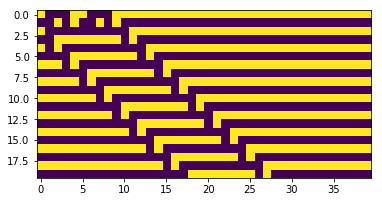

In [62]:
x = create_1d_grid(40)
x[2] = 1
x[7] = 1

y = simulate_1d_CA(x, 9, 20)

fig = plt.figure()
im = plt.imshow(y)

In [45]:
format(40, 'b')

'101000'